<a href="https://colab.research.google.com/github/Whisperer8526/Kaggle-Competitions/blob/main/Titanic%20-%20Dataset%20preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

train = files.upload()

Saving train.csv to train (1).csv


In [ ]:
raw_data = pd.read_csv("train.csv")

In [ ]:
data = raw_data.copy()

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titles = ["Mr. ", "Mrs.", "Miss.", "Master.", "Rev.", "Mme.", "Dr.", "Major.",
          "Lady.", "Sir.", "Col.", "Mlle.", "Capt.", "Countess.", "Jonkheer.", "Ms.", "Don.", "Dona."]

In [ ]:
decks = ["A", "B", "C", "D", "E", "F", "G", "T"]

In [ ]:
for name in data["Name"]:
  for title in titles:
    if title in name:
      data["Name"].replace(name, title, inplace=True)

for cabin in data["Cabin"]:
  for letter in decks:
    if letter in str(cabin):
      data["Cabin"].replace(cabin, letter, inplace=True)

data["Cabin"].fillna("U", inplace=True)

In [ ]:
data["Cabin"].head(10)

0    U
1    C
2    U
3    C
4    U
5    U
6    E
7    U
8    U
9    U
Name: Cabin, dtype: object

In [ ]:
data.drop(columns=["Ticket"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,Mr.,male,22.0,1,0,7.2500,U,S
1,2,1,1,Mrs.,female,38.0,1,0,71.2833,C,C
2,3,1,3,Miss.,female,26.0,0,0,7.9250,U,S
3,4,1,1,Mrs.,female,35.0,1,0,53.1000,C,S
4,5,0,3,Mr.,male,35.0,0,0,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev.,male,27.0,0,0,13.0000,U,S
887,888,1,1,Miss.,female,19.0,0,0,30.0000,B,S
888,889,0,3,Miss.,female,NaN,1,2,23.4500,U,S
889,890,1,1,Mr.,male,26.0,0,0,30.0000,C,C


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
classes = pd.get_dummies(data.Pclass, prefix="Pclass")
title = pd.get_dummies(data.Name, prefix="title")
sex = pd.get_dummies(data.Sex, prefix="sex")
cabin = pd.get_dummies(data.Cabin, prefix="cabin")
embarked = pd.get_dummies(data.Embarked, prefix="embarked")

In [ ]:
numeric = data[["Age", "SibSp", "Parch", "Fare"]]

In [ ]:
encoded_set = classes.join(title).join(sex).join(numeric).join(cabin).join(embarked)
encoded_set


,Pclass_1,Pclass_2,Pclass_3,title_Capt.,title_Col.,title_Countess.,title_Don.,title_Dr.,title_Jonkheer.,title_Lady.,title_Major.,title_Master.,title_Miss.,title_Mlle.,title_Mme.,title_Mr.,title_Mrs.,title_Ms.,title_Rev.,title_Sir.,sex_female,sex_male,Age,SibSp,Parch,Fare,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,embarked_C,embarked_Q,embarked_S
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,35.0,0,0,8.0500,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,27.0,0,0,13.0000,0,0,0,0,0,0,0,0,1,0,0,1
887,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,19.0,0,0,30.0000,0,1,0,0,0,0,0,0,0,0,0,1
888,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,NaN,1,2,23.4500,0,0,0,0,0,0,0,0,1,0,0,1
889,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,26.0,0,0,30.0000,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
 from sklearn.impute import KNNImputer
 imputer = KNNImputer(n_neighbors=5)
 imputed = imputer.fit_transform(encoded_set)
 train_dataset = pd.DataFrame(data=imputed, columns=encoded_set.columns)
 train_dataset

,Pclass_1,Pclass_2,Pclass_3,title_Capt.,title_Col.,title_Countess.,title_Don.,title_Dr.,title_Jonkheer.,title_Lady.,title_Major.,title_Master.,title_Miss.,title_Mlle.,title_Mme.,title_Mr.,title_Mrs.,title_Ms.,title_Rev.,title_Sir.,sex_female,sex_male,Age,SibSp,Parch,Fare,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_T,cabin_U,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,0.0,0.0,13.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.2,1.0,2.0,23.4500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
889,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass_1         891 non-null    float64
 1   Pclass_2         891 non-null    float64
 2   Pclass_3         891 non-null    float64
 3   title_Capt.      891 non-null    float64
 4   title_Col.       891 non-null    float64
 5   title_Countess.  891 non-null    float64
 6   title_Don.       891 non-null    float64
 7   title_Dr.        891 non-null    float64
 8   title_Jonkheer.  891 non-null    float64
 9   title_Lady.      891 non-null    float64
 10  title_Major.     891 non-null    float64
 11  title_Master.    891 non-null    float64
 12  title_Miss.      891 non-null    float64
 13  title_Mlle.      891 non-null    float64
 14  title_Mme.       891 non-null    float64
 15  title_Mr.        891 non-null    float64
 16  title_Mrs.       891 non-null    float64
 17  title_Ms.       

(array([14., 10.,  6., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  4.,  4.,
         6.,  7., 18., 15., 27., 28., 16., 40., 32., 16., 31., 31., 22.,
        33., 32., 41., 35., 26., 23., 27., 22., 27., 24., 12., 15., 14.,
        23., 11., 15.,  9., 10., 12.,  5., 11., 12.,  7., 10., 11.,  6.,
         3.,  8.,  2.,  5.,  2.,  5.,  2.,  4.,  3.,  4.,  2.,  2.,  3.,
         1.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 0.42   ,  1.41475,  2.4095 ,  3.40425,  4.399  ,  5.39375,
         6.3885 ,  7.38325,  8.378  ,  9.37275, 10.3675 , 11.36225,
        12.357  , 13.35175, 14.3465 , 15.34125, 16.336  , 17.33075,
        18.3255 , 19.32025, 20.315  , 21.30975, 22.3045 , 23.29925,
        24.294  , 25.28875, 26.2835 , 27.27825, 28.273  , 29.26775,
        30.2625 , 31.25725, 32.252  , 33.24675, 34.2415 , 35.23625,
        36.231  , 37.22575, 38.2205 , 39.21525, 40.21   , 41.20475,
        42.1995 , 43.19425, 44.189  , 45.18375, 46.1785 , 47.17325

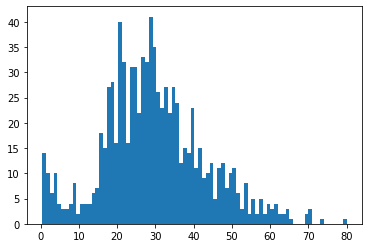

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(train_dataset["Age"] , bins=80)

In [ ]:
data["Cabin"].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [ ]:
train_dataset.shape

(891, 38)

In [ ]:
test = files.upload()

Saving test.csv to test (2).csv


In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr.,male,34.5,0,0,330911,7.8292,U,Q
1,893,3,Mrs.,female,47.0,1,0,363272,7.0000,U,S
2,894,2,Mr.,male,62.0,0,0,240276,9.6875,U,Q
3,895,3,Mr.,male,27.0,0,0,315154,8.6625,U,S
4,896,3,Mrs.,female,22.0,1,1,3101298,12.2875,U,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr.,male,NaN,0,0,A.5. 3236,8.0500,U,S
414,1306,1,Dona.,female,39.0,0,0,PC 17758,108.9000,C,C
415,1307,3,Mr.,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,U,S
416,1308,3,Mr.,male,NaN,0,0,359309,8.0500,U,S


In [ ]:
for name in test_data["Name"]:
  for title in titles:
    if title in name:
      test_data["Name"].replace(name, title, inplace=True)

for cabin in test_data["Cabin"]:
  for letter in decks:
    if letter in str(cabin):
      test_data["Cabin"].replace(cabin, letter, inplace=True)

test_data["Cabin"].fillna("U", inplace=True)

test_data.drop(columns=["Ticket"])

classes_test = pd.get_dummies(test_data.Pclass, prefix="Pclass")
title_test = pd.get_dummies(test_data.Name, prefix="title")
sex_test = pd.get_dummies(test_data.Sex, prefix="sex")
cabin_test = pd.get_dummies(test_data.Cabin, prefix="cabin")
embarked_test = pd.get_dummies(test_data.Embarked, prefix="embarked")

numeric_test = test_data[["Age", "SibSp", "Parch", "Fare"]]

encoded_test = classes_test.join(title_test).join(sex_test).join(numeric_test).join(cabin_test).join(embarked_test)

imputed_test = imputer.fit_transform(encoded_test)
test_dataset = pd.DataFrame(data=imputed_test, columns=encoded_test.columns)
test_dataset

,Pclass_1,Pclass_2,Pclass_3,title_Col.,title_Dona.,title_Dr.,title_Master.,title_Miss.,title_Mr.,title_Mrs.,title_Ms.,title_Rev.,sex_female,sex_male,Age,SibSp,Parch,Fare,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_G,cabin_U,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,34.5,0.0,0.0,7.8292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,47.0,1.0,0.0,7.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62.0,0.0,0.0,9.6875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,1.0,1.0,12.2875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.7,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39.0,0.0,0.0,108.9000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
415,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,38.5,0.0,0.0,7.2500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
416,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,33.7,0.0,0.0,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
test_dataset.shape

(418, 29)

In [ ]:
train_col = []

for col in train_dataset.columns:
  if col not in test_dataset.columns:
    train_col.append(col)

train_col

['title_Countess.',
 'title_Don.',
 'title_Jonkheer.',
 'title_Lady.',
 'title_Major.',
 'title_Mlle.',
 'title_Mme.',
 'title_Sir.',
 'cabin_T']

In [ ]:
test_col = []

for col in test_dataset.columns:
  if col not in train_dataset.columns:
    train_col.append(col)

test_col

[]

In [ ]:
for col in train_col:
  test_dataset.insert(0, col, 0)

ValueError: ignored

In [ ]:
train_dataset = train_dataset.reindex(sorted(train_dataset.columns), axis=1)
test_dataset = test_dataset.reindex(sorted(test_dataset.columns), axis=1)

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              891 non-null    float64
 1   Fare             891 non-null    float64
 2   Parch            891 non-null    float64
 3   Pclass_1         891 non-null    float64
 4   Pclass_2         891 non-null    float64
 5   Pclass_3         891 non-null    float64
 6   SibSp            891 non-null    float64
 7   cabin_A          891 non-null    float64
 8   cabin_B          891 non-null    float64
 9   cabin_C          891 non-null    float64
 10  cabin_D          891 non-null    float64
 11  cabin_E          891 non-null    float64
 12  cabin_F          891 non-null    float64
 13  cabin_G          891 non-null    float64
 14  cabin_T          891 non-null    float64
 15  cabin_U          891 non-null    float64
 16  embarked_C       891 non-null    float64
 17  embarked_Q      

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              418 non-null    float64
 1   Fare             418 non-null    float64
 2   Parch            418 non-null    float64
 3   Pclass_1         418 non-null    float64
 4   Pclass_2         418 non-null    float64
 5   Pclass_3         418 non-null    float64
 6   SibSp            418 non-null    float64
 7   cabin_A          418 non-null    float64
 8   cabin_B          418 non-null    float64
 9   cabin_C          418 non-null    float64
 10  cabin_D          418 non-null    float64
 11  cabin_E          418 non-null    float64
 12  cabin_F          418 non-null    float64
 13  cabin_G          418 non-null    float64
 14  cabin_T          418 non-null    int64  
 15  cabin_U          418 non-null    float64
 16  embarked_C       418 non-null    float64
 17  embarked_Q      

In [ ]:
train_dataset.insert(0, 'title_Dona.', 0)

In [ ]:
X_train = train_dataset
y_train = np.array(data["Survived"])
X_test = test_dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(train_dataset)
X_test = scaler.fit_transform(test_dataset)
X_train.shape

(891, 39)

In [ ]:
X_test.shape

(418, 39)

In [ ]:
X_train_npy = np.save("X_train.npy", X_train)
X_test_npy = np.save("X_test.npy", X_test)
y_train_npy = np.save("y_train.npy", y_train)

In [ ]:
y_train_npy

In [ ]:
files.download()

TypeError: ignored

In [ ]:
from tensorflow import keras
from functools import partial

RegularDense = partial(keras.layers.Dense,
                       activation="elu", 
                       kernel_initializer="he_normal")
                       #kernel_regularizer=keras.regularizers.l1_l2(0.001))

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer())
model.add(RegularDense(74))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(148))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(296))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(148))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(74))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(37))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(19))

model.add(keras.layers.BatchNormalization())
model.add(RegularDense(10))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation="sigmoid",
                                  kernel_initializer="glorot_uniform"))

ValueError: ignored

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",
             optimizer=RMSprop(learning_rate=0.01, decay=0.0001),
             metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=100,
                   batch_size=32, validation_split=0.15, 
                    shuffle=True)

Epoch 1/100
24/24 [==============================] - 3s 19ms/step - loss: 0.6115 - accuracy: 0.6855 - val_loss: 1.1091 - val_accuracy: 0.8134
Epoch 2/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4664 - accuracy: 0.7840 - val_loss: 0.6592 - val_accuracy: 0.8358
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4390 - accuracy: 0.7914 - val_loss: 0.6808 - val_accuracy: 0.8582
Epoch 4/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4388 - accuracy: 0.8135 - val_loss: 0.9288 - val_accuracy: 0.8582
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4085 - accuracy: 0.8391 - val_loss: 0.5253 - val_accuracy: 0.8134
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.4524 - accuracy: 0.8263 - val_loss: 0.6515 - val_accuracy: 0.8582
Epoch 7/100
24/24 [==============================] - 0s 7ms/step - loss: 0.4023 - accuracy: 0.8124 - val_loss: 0.6125 - val_accuracy: 0.8134
Epoch 8/100
